# Multinomial Naïve Bayes Classifier - the YouTube Dataset

### Introducing the database

The database for this example is taken from https://archive.ics.uci.edu/ml/machine-learning-databases/00380/ 

We usually modify the databases slightly such that they fit the purpose of the course. Therefore, we suggest you use the database provided in the resources in order to obtain the same results as the ones in the lectures.

### Importing the necessary libraries

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import glob

### Reading the database

In [10]:
files = glob.glob('youtube-dataset\\*.csv')
files

['youtube-dataset\\Youtube01.csv',
 'youtube-dataset\\Youtube02.csv',
 'youtube-dataset\\Youtube03.csv',
 'youtube-dataset\\Youtube04.csv',
 'youtube-dataset\\Youtube05.csv']

In [11]:
# Creating the empty list for Appending all the above 4 datasets using loop:
all_df = []

for i in files:
    all_df.append(pd.read_csv(i))
    

In [12]:
# to see the first dataset:
all_df[0]

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"Hey, check out my new website!! This site is a...",1
...,...,...,...,...,...
344,z13th1q4yzihf1bll23qxzpjeujterydj,Carmen Racasanu,2014-11-14T13:27:52,How can this have 2 billion views when there's...,0
345,z13fcn1wfpb5e51xe04chdxakpzgchyaxzo0k,diego mogrovejo,2014-11-14T13:28:08,I don't now why I'm watching this in 2014﻿,0
346,z130zd5b3titudkoe04ccbeohojxuzppvbg,BlueYetiPlayz -Call Of Duty and More,2015-05-23T13:04:32,subscribe to me for call of duty vids and give...,1
347,z12he50arvrkivl5u04cctawgxzkjfsjcc4,Photo Editor,2015-06-05T14:14:48,hi guys please my android photo editor downloa...,1


In [13]:
# To classify comments as Ham or Spam we dont need COMMENT_ID, AUTHOR, DATE COLUMNS, SO WE DROP THEM
all_df = []
for i in files:
    all_df.append(pd.read_csv(i).drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis=1))

In [14]:
all_df[0]

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
344,How can this have 2 billion views when there's...,0
345,I don't now why I'm watching this in 2014﻿,0
346,subscribe to me for call of duty vids and give...,1
347,hi guys please my android photo editor downloa...,1


In [15]:
# Now we'd like to combine all samples from all five data frame files into one big dataframe:
data = pd.concat(all_df, axis=0, ignore_index=True) # axis=9 means concat will be row wise, ingnore index ignores the index and set it to 0 till N-1
data

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
1950,I love this song because we sing it at Camp al...,0
1951,I love this song for two reasons: 1.it is abou...,0
1952,wow,0
1953,Shakira u are so wiredo,0


In [16]:
# To check the Null values:
data.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [17]:
# also look the ham and spam of the dataset
data['CLASS'].value_counts() # here, 1 ->represents Spam, and 0-> represents Ham

CLASS
1    1004
0     951
Name: count, dtype: int64

### In order to Niave Bayes performance, the dataset needs to be Balanced which roughly means
### the classes needs to be the same number of representatives from each class

## Sklearn CountVectorize Class->

In [20]:
# What it does is tokenized strings and count the
# occurrences of each token within a comment.

In [21]:
# Importing the Library:
from sklearn.feature_extraction.text import CountVectorizer

### Sample 1

In [23]:
message_sample = ['This is a dog']

# creating instance of CountVectorizer class:
vectorize_sample = CountVectorizer()
# similar to the way variables are standardize in sklearn, we apply fit method to vectorize sample
vectorize_sample.fit(message_sample)
# Next we apply transform method, which outputs 1x3 sparse matrix
vectorize_sample.transform(message_sample).toarray() # toarray -> to display the matrix

array([[1, 1, 1]], dtype=int64)

In [24]:
# Now lets use get_feature_names_out() method to check the word corresponding to each token:
vectorize_sample.get_feature_names_out()

array(['dog', 'is', 'this'], dtype=object)

In [25]:
# As we can see, each word in the array appears once as the 1x3 array displays 

In [26]:
# lets try something else:
vectorize_sample.transform(['This is a cat']).toarray()

array([[0, 1, 1]], dtype=int64)

In [27]:
# we can see that this time we see 0 in the array, which represents 'cat' as cat was not in our prior array

### Sample 2

In [29]:
message_sample2 = ['this is a dog and that is a dog', 'this is a cat']

In [30]:
vectorize_sample2 = CountVectorizer()
vectorize_sample2.fit_transform(message_sample2).toarray()

array([[1, 0, 2, 2, 1, 1],
       [0, 1, 0, 1, 0, 1]], dtype=int64)

In [31]:
vectorize_sample2.get_feature_names_out()

array(['and', 'cat', 'dog', 'is', 'that', 'this'], dtype=object)

In [32]:
# We are pleased to see that a zero has been correctly assigned to the word 'cat' in the first row
# And the words and 'dog' and 'that' in the 2nd row
# Moreover, 'dog' and 'is' appears twice in the first string

In [33]:
vectorize_sample2.transform(['those are birds']).toarray()

array([[0, 0, 0, 0, 0, 0]], dtype=int64)

### Defining the inputs and the target. Creating the train-test split.

In [35]:
# Importing train/test split:
from sklearn.model_selection import train_test_split

In [36]:
inputs = data['CONTENT']
targets = data['CLASS']

In [37]:
x_train,x_test,y_train,y_test = train_test_split(inputs, targets, test_size=0.2, random_state=365,stratify=targets)
#stratify=target-> We do this to make sure that equal portions of the two classes enter the training and the testing set

In [38]:
y_train.value_counts(normalize=True) # to check the equal portion of the target class

CLASS
1    0.513427
0    0.486573
Name: proportion, dtype: float64

In [39]:
y_test.value_counts(normalize=True)

CLASS
1    0.514066
0    0.485934
Name: proportion, dtype: float64

### Tokenizing the YouTube comments

In [41]:
vectorizer= CountVectorizer()

In [42]:
x_train_transf = vectorizer.fit_transform(x_train)
x_test_transf = vectorizer.transform(x_test)

In [43]:
x_train_transf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
x_train_transf.shape

(1564, 3925)

In [45]:
x_test_transf.shape

(391, 3925)

### Performing the classification

In [47]:
from sklearn.naive_bayes import MultinomialNB

In [48]:
clf = MultinomialNB(class_prior = np.array([0.6,0.4]))

In [49]:
clf.fit(x_train_transf, y_train)# clf is unfamiliar with the dataset, we need to let our model to learn from our training data

MultinomialNB(class_prior=array([0.6, 0.4]))

In [50]:
clf.get_params()

{'alpha': 1.0,
 'class_prior': array([0.6, 0.4]),
 'fit_prior': True,
 'force_alpha': True}

In [51]:
np.exp(clf.class_log_prior_)

array([0.6, 0.4])

In [52]:
# Let's change that by providing an additional argument to the naive Bayes model.

### Performing the evaluation on the test dataset

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

In [55]:
y_test_pred = clf.predict(x_test_transf)

In [56]:
# Let's compare them with the true test labels by constructing a so called confusion matrix

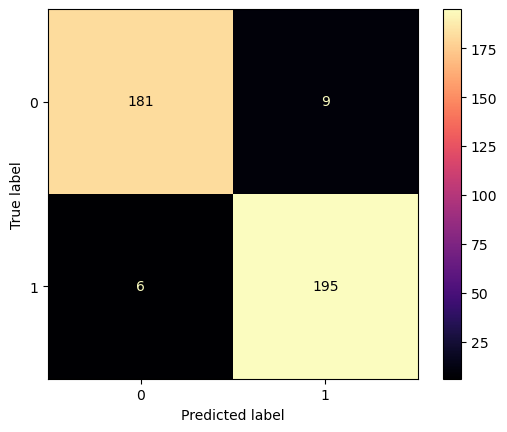

In [57]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test,y_test_pred,
    labels=clf.classes_,
    cmap='magma'
)

### Evaluating the model:

In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_test,y_test_pred, target_names=['Ham','Spam']))

              precision    recall  f1-score   support

         Ham       0.97      0.95      0.96       190
        Spam       0.96      0.97      0.96       201

    accuracy                           0.96       391
   macro avg       0.96      0.96      0.96       391
weighted avg       0.96      0.96      0.96       391



In [61]:
# Precision-> precision can be thought of as accuracy for a specific class
# In the case of the spam class, it gives you the number of correctly classified spams over all samples classified as spam

In [62]:
# Recall-> On the other hand, recall gives you an idea about how many of the true spam comments the model has caught and how many it has missed

In [63]:
# f1-score-> F1 = harmonic mean of precision and recall

### Creating probability-distribution figures

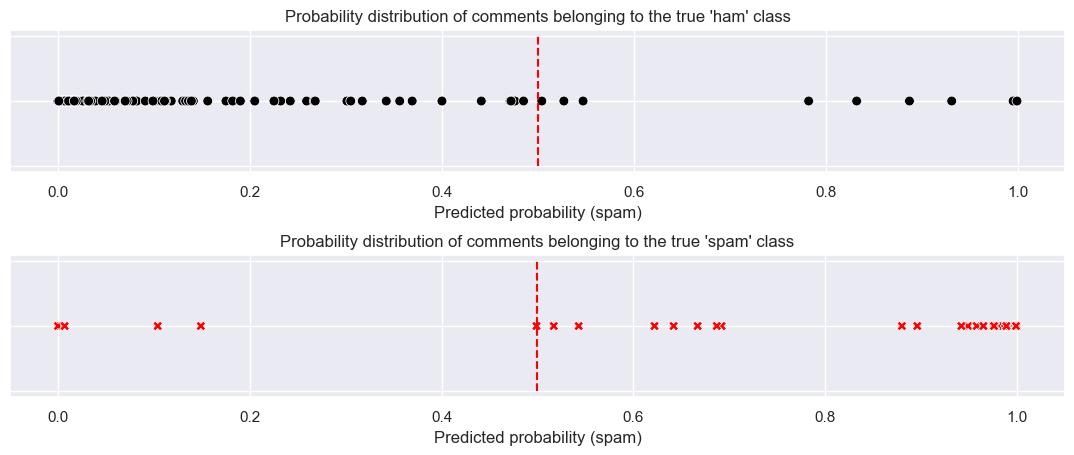

In [65]:
spam_proba = clf.predict_proba(x_test_transf).round(3)[:,1];

df_scatter = pd.DataFrame()

df_scatter['True class'] = y_test
df_scatter['Predicted class'] = y_test_pred
df_scatter['Predicted probability (spam)'] = spam_proba

df_scatter = df_scatter.reset_index(drop = True)

palette_0 = sns.color_palette(['#000000'])
palette_1 = sns.color_palette(['#FF0000'])

df_scatter_0 = df_scatter[df_scatter['True class'] == 0].reset_index(drop = True)
df_scatter_1 = df_scatter[df_scatter['True class'] == 1].reset_index(drop = True)

sns.set()

fig, (ax1,ax2) = plt.subplots(2,1, figsize=(12,5))
fig.tight_layout(pad = 3)

sns.scatterplot(x = 'Predicted probability (spam)', 
                y = np.zeros(df_scatter_0.shape[0]), 
                data = df_scatter_0,
                hue = 'True class', 
                s = 50,
                markers = ['o'],
                palette = palette_0,
                style = 'True class',
                legend = False, 
                ax = ax1).set(yticklabels=[])

ax1.set_title('Probability distribution of comments belonging to the true \'ham\' class')
ax1.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');


sns.scatterplot(x = 'Predicted probability (spam)', 
                y = np.zeros(df_scatter_1.shape[0]), 
                hue = 'True class', 
                data = df_scatter_1,
                s = 50,
                palette = palette_1,
                markers = ['X'],
                style = 'True class',
                legend = False, 
                ax = ax2).set(yticklabels=[])

ax2.set_title('Probability distribution of comments belonging to the true \'spam\' class')

ax2.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');

### Making predictions

In [116]:
predict_data = vectorizer.transform(['This song is amazing!',
                                     'you can win 1m dollar, just click here!'])

In [118]:
clf.predict(predict_data)

array([0, 1], dtype=int64)

In [122]:
# here we can see that our model predicts the above 2 sentences as 'Ham' & 'Spam' corresponding [0,1] correctly